In [27]:
from __future__ import print_function
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cross_validation, datasets, linear_model


Automatically created module for IPython interactive environment


In [28]:
diabetes = datasets.load_diabetes()
X = diabetes.data[:150]
y = diabetes.target[:150]

lasso = linear_model.Lasso()
alphas = np.logspace(-4, -.5, 30)

scores = list()
scores_std = list()

for alpha in alphas:
    lasso.alpha = alpha
    this_scores = cross_validation.cross_val_score(lasso, X, y, n_jobs=-1)
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))


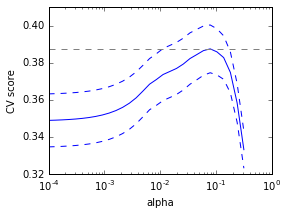

In [29]:
%matplotlib inline
plt.figure(figsize=(4, 3))
plt.semilogx(alphas, scores)
# plot error lines showing +/- std. errors of the scores
plt.semilogx(alphas, np.array(scores) + np.array(scores_std) / np.sqrt(len(X)),
             'b--')
plt.semilogx(alphas, np.array(scores) - np.array(scores_std) / np.sqrt(len(X)),
             'b--')
plt.ylabel('CV score')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')

plt.show()

In [30]:

##############################################################################
# Bonus: how much can you trust the selection of alpha?

# To answer this question we use the LassoCV object that sets its alpha
# parameter automatically from the data by internal cross-validation (i.e. it
# performs cross-validation on the training data it receives).
# We use external cross-validation to see how much the automatically obtained
# alphas differ across different cross-validation folds.
lasso_cv = linear_model.LassoCV(alphas=alphas)
k_fold = cross_validation.KFold(len(X), 3)

print("Answer to the bonus question:",
      "how much can you trust the selection of alpha?")
print()
print("Alpha parameters maximising the generalization score on different")
print("subsets of the data:")
for k, (train, test) in enumerate(k_fold):
    lasso_cv.fit(X[train], y[train])
    print("[fold {0}] alpha: {1:.5f}, score: {2:.5f}".
          format(k, lasso_cv.alpha_, lasso_cv.score(X[test], y[test])))
print()
print("Answer: Not very much since we obtained different alphas for different")
print("subsets of the data and moreover, the scores for these alphas differ")
print("quite substantially.")


Answer to the bonus question: how much can you trust the selection of alpha?

Alpha parameters maximising the generalization score on different
subsets of the data:
[fold 0] alpha: 0.10405, score: 0.53573
[fold 1] alpha: 0.05968, score: 0.16278
[fold 2] alpha: 0.10405, score: 0.44437

Answer: Not very much since we obtained different alphas for different
subsets of the data and moreover, the scores for these alphas differ
quite substantially.


In [31]:
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ..., 
       [-0.05637009, -0.04464164,  0.09295276, ...,  0.02545259,
         0.02605609,  0.04034337],
       [-0.06000263,  0.05068012,  0.01535029, ..., -0.00259226,
        -0.03075121, -0.0010777 ],
       [-0.04910502,  0.05068012, -0.00512814, ...,  0.07120998,
         0.06123791, -0.03835666]])

In [32]:
y

array([ 151.,   75.,  141.,  206.,  135.,   97.,  138.,   63.,  110.,
        310.,  101.,   69.,  179.,  185.,  118.,  171.,  166.,  144.,
         97.,  168.,   68.,   49.,   68.,  245.,  184.,  202.,  137.,
         85.,  131.,  283.,  129.,   59.,  341.,   87.,   65.,  102.,
        265.,  276.,  252.,   90.,  100.,   55.,   61.,   92.,  259.,
         53.,  190.,  142.,   75.,  142.,  155.,  225.,   59.,  104.,
        182.,  128.,   52.,   37.,  170.,  170.,   61.,  144.,   52.,
        128.,   71.,  163.,  150.,   97.,  160.,  178.,   48.,  270.,
        202.,  111.,   85.,   42.,  170.,  200.,  252.,  113.,  143.,
         51.,   52.,  210.,   65.,  141.,   55.,  134.,   42.,  111.,
         98.,  164.,   48.,   96.,   90.,  162.,  150.,  279.,   92.,
         83.,  128.,  102.,  302.,  198.,   95.,   53.,  134.,  144.,
        232.,   81.,  104.,   59.,  246.,  297.,  258.,  229.,  275.,
        281.,  179.,  200.,  200.,  173.,  180.,   84.,  121.,  161.,
         99.,  109.,

In [33]:
#importing roughness dataset
import pandas as pd

d1 = pd.read_csv('../modelDatasets/rcModelData1215.csv')
d2 = pd.read_csv('../modelDatasets/weatherCovs1988_99.csv')

In [34]:
d1.head()

,Unnamed: 0,UID,sYear,Rutting,IRI,PSC,Alli,Long,Is Bridge,Lane Miles,...,IRIsi,esals,ppt,mint,maxt,ICAO,ftc,SR,Begin ARM,End ARM
0,25095,1,1988,0.748,17.736993,67,0.001370,0.056856,0,0.36,...,3.359280,17996.598271,918.010010,33.584,74.336001,KPAE,5,2,0,0.1
1,26540,1,1989,0.236,17.736993,82,0.000000,0.029924,0,0.36,...,3.359280,18686.830557,833.750000,26.042,72.968000,KPAE,11,2,0,0.1
2,28193,1,1990,0.236,18.159243,82,0.000000,0.029924,0,0.36,...,3.439252,19088.431115,1106.859985,28.454,76.333998,KPAE,18,2,0,0.1
3,29936,1,1991,0.236,18.159243,71,0.000000,0.056856,0,0.36,...,3.439252,19903.607821,848.960022,32.378,77.666002,KPAE,5,2,0,0.1
4,15536,1,1996,0.276,20.059659,66,0.010038,0.056856,0,0.36,...,3.799179,22868.344489,1188.750000,32.054,77.575999,KPAE,24,2,0,0.1


In [35]:
d2.head()

,Unnamed: 0,UID,Year,latitude,longitude,A0,A1,A2,A3,B1,B2,B3,C1,C2,C3
0,0,1,1988,47.978215,-122.169366,5,32,91,242,19,5,0,25.388300,13.78,917.990000
1,1,27,1988,47.978414,-122.133338,6,34,103,229,19,5,0,27.981300,13.61,976.620000
2,2,43,1988,47.958874,-122.102727,7,36,111,219,19,4,0,30.215501,25.36,1062.939999
3,3,66,1988,47.947539,-122.070079,7,36,111,219,19,4,0,30.215501,25.36,1062.939999
4,4,81,1988,47.922928,-122.062374,7,31,116,219,19,7,0,27.585199,21.45,1131.900003


In [36]:
dmerged = pd.merge(d1,d2, how = 'left', left_on = ['UID', 'sYear'], right_on = ['UID', 'Year'])
print(len(dmerged) == len(d1))

True


In [37]:
dmerged.columns

Index([u'Unnamed: 0_x', u'UID', u'sYear', u'Rutting', u'IRI', u'PSC', u'Alli',
       u'Long', u'Is Bridge', u'Lane Miles', u'Segment Lane Miles',
       u'ESALs Since Major Rehab', u'sfThick', u'Tthick', u'TSfThick',
       u'STcode', u'cumPPT', u'meanMinTemp', u'meanMaxTemp', u'cumESALs',
       u'cumFTC', u'pAlli', u'pLong', u'IRIsi', u'esals', u'ppt', u'mint',
       u'maxt', u'ICAO', u'ftc', u'SR', u'Begin ARM', u'End ARM',
       u'Unnamed: 0_y', u'Year', u'latitude', u'longitude', u'A0', u'A1',
       u'A2', u'A3', u'B1', u'B2', u'B3', u'C1', u'C2', u'C3'],
      dtype='object')

In [38]:
data = dmerged[[u'UID', u'sYear', u'Rutting', u'IRI', u'PSC', u'Alli',
       u'Long', u'Is Bridge', u'Lane Miles', u'Segment Lane Miles',
       u'ESALs Since Major Rehab', u'sfThick', u'Tthick', u'TSfThick',
       u'STcode', u'cumPPT', u'meanMinTemp', u'meanMaxTemp', u'cumESALs',
       u'cumFTC', u'pAlli', u'pLong', u'IRIsi', u'esals', u'ppt', u'mint',
       u'maxt', u'ICAO', u'ftc', u'SR', u'Begin ARM', u'End ARM',
       u'Unnamed: 0_y', u'Year', u'latitude', u'longitude', u'A0', u'A1',
       u'A2', u'A3', u'B1', u'B2', u'B3', u'C1', u'C2', u'C3']]

In [39]:
data.to_csv('../modelDatasets/rdata_mod_weather_covs.csv')

In [40]:
rdata = data[['IRIsi', u'Rutting', u'Is Bridge', u'sfThick', u'Tthick', u'TSfThick', u'cumESALs',
              u'pAlli', u'pLong', u'esals', u'A0', u'A1', u'A2', u'A3', u'B1', u'B2', u'B3', u'C1', u'C2', u'C3']]
rdata.to_csv('../modelDatasets/rdata.csv')

In [41]:
Xm = data[[u'Rutting', u'Is Bridge', u'sfThick', u'Tthick', u'TSfThick', u'cumESALs',
          u'pAlli', u'pLong', u'esals', u'A0', u'A1', u'A2', u'A3', u'B1', u'B2', u'B3', u'C1', u'C2', u'C3']]
ym = np.array(data.IRIsi)

In [42]:
# Running the lasso model

lasso = linear_model.Lasso()
alphas = np.logspace(-4, -.5, 30)

scores = list()
scores_std = list()

for alpha in alphas:
    lasso.alpha = alpha
    this_scores = cross_validation.cross_val_score(lasso, Xm, ym, n_jobs=-1)
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))

/Users/Alan/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:444: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)
/Users/Alan/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:444: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)
/Users/Alan/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:444: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)
/Users/Alan/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:444: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)
/Users/Alan/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:444: ConvergenceWarning: Ob

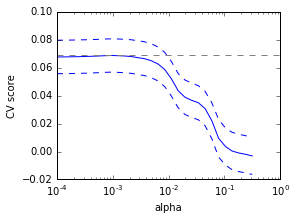

In [43]:
%matplotlib inline
plt.figure(figsize=(4, 3))
plt.semilogx(alphas, scores)
# plot error lines showing +/- std. errors of the scores
plt.semilogx(alphas, np.array(scores) + np.array(scores_std) / np.sqrt(len(X)),
             'b--')
plt.semilogx(alphas, np.array(scores) - np.array(scores_std) / np.sqrt(len(X)),
             'b--')
plt.ylabel('CV score')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')

plt.show()

In [50]:
#perfoming lasso-cross validation
lasso_cv = linear_model.LassoCV(eps=0.01, n_alphas=100, alphas=None, fit_intercept=True, normalize=True, 
                                precompute='auto', max_iter=1000, copy_X=False, cv=10, 
                                verbose=False, n_jobs=-1, positive=False, random_state=None, selection='cyclic')
model = lasso_cv.fit(Xm, ym)

In [45]:
Xm.columns

Index([u'Rutting', u'Is Bridge', u'sfThick', u'Tthick', u'TSfThick',
       u'cumESALs', u'pAlli', u'pLong', u'esals', u'A0', u'A1', u'A2', u'A3',
       u'B1', u'B2', u'B3', u'C1', u'C2', u'C3'],
      dtype='object')

In [52]:
model.coef_

array([ 12.05064139,   3.11529809,  -2.7286782 ,  -8.18718024,
        -6.02383624,   4.51065003,   4.90447018,   0.3578905 ,
       -27.70823572,   9.86819853,   9.22734871,  -4.96757427,
        24.42613756,   7.1829754 ,  -7.39220785,   6.9343331 ,
         3.08919432,  -1.42566833,   7.90197012])

In [53]:
model.intercept_

2.2033904279842975

In [54]:
model.n_iter_

245